In [1]:
%run func_def.ipynb

imports loaded.

> Pre-Processing func:
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_prob(name, date, df)
    get_win_streak(name, date, df) #return count of recent wins
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )

> Feature Engineering func:
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data) # return fighter & opponent statistics swapped. 
    get_wins(combo, data)
    get_wins_ratio(combo, data)

> outlier_cleaning func:
    set_outlier_detection_model(X_columns, data)

> model_stats_pred_training func:
    set_lower_cases(string)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_xgboost_reg(X_columns, y_columns, data, n=200, learning_rate=0.2, subsample=0.4, max_depth=5)
    set_predictions(model, data, X_columns, y_columns)
    get_mean_percentage_error(act,

SyntaxError: invalid syntax (<ipython-input-1-d960544c3de0>, line 1)

### <span style='color:green'> **[done]** </span>Loading Feature's-ready data

In [2]:
loc = '../data/'
file = 'data_features_outliers_detected.csv'
data = pd.read_csv(loc+file)
data.tail(3)

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier
6314,win,Remco Pardoel,Alberta Cerra Leon,1994-03-11,Open Weight,SUB,Ezekiel Choke,-0.001066,0.110079,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,1.572764,0.021975,0.008778,-0.008685,False,False
6315,lose,Robert Lucarelli,Orlando Wiet,1994-03-11,Open Weight,KO/TKO,Other,-0.001066,-0.221366,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,-1.002921,0.021975,0.008778,-0.008685,False,False
6316,win,Johnny Rhodes,David Levicki,1994-03-11,Open Weight,KO/TKO,Punches,-0.001066,0.257388,0.399174,0.014263,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,0.116418,0.021975,0.008778,-0.008685,False,False


#### <span style='color:green'> **[done]** </span>X & Y definitions:

In [3]:
req_data = ['date','fighter','opponent','weight_class','result','method','outlier','lof_outlier']
y = ['kd_dif','str_dif','td_dif','sub_dif']
X = []

for column in data.columns:
    if ('_dif' in column and column not in y) or 'ratio' in column:
        X.append(column)

data = data[req_data + y + X]
print('X: %s' %X)
print('y: %s' %y)
data.head(3)

X: ['td_avg_dif', 'td_def_dif', 'sub_avg_dif', 'slpm_dif', 'str_acc_dif', 'sapm_dif', 'str_def_dif', 'stance_win_ratio', 'win_perc_dif', 'win_strk_dif', 'lose_strk_dif']
y: ['kd_dif', 'str_dif', 'td_dif', 'sub_dif']


,date,fighter,opponent,weight_class,result,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
0,2023-04-15,Max Holloway,Arnold Allen,Featherweight,win,U-DEC,False,False,-0.001066,2.614333,0.006649,0.014263,-0.462657,0.269928,0.0,2.400916,0.586269,1.226051,-0.172459,-1.002921,-0.646471,0.380937,-0.592359
1,2023-04-15,Edson Barboza,Billy Quarantillo,Featherweight,win,KO/TKO,False,False,1.345659,0.073252,0.006649,0.014263,-0.625180,0.581735,-1.1,-2.430547,-1.146943,-1.050470,1.565195,0.116418,-0.275112,0.380937,-0.592359
2,2023-04-15,Azamat Murzakanov,Dustin Jacoby,Light Heavyweight,win,U-DEC,False,False,1.345659,0.110079,0.006649,0.014263,0.204245,0.789606,0.0,-0.549548,0.833871,-0.569871,-0.085576,1.572764,0.517120,0.753095,-1.176033


#### <span style='color:green'> **[done]** </span>Train/test/validation assigment:

In [4]:
data = set_train_test(X_columns=X, y_columns=y, data=data, test_size=0.3, valid_size=0.3)
data.to_csv('../data/data_train_test_valid.csv', index=None)
data.tail(3)

Data split: Data=(6317, 24), train_set=(3076, 11), validation_set=(1336, 11), test_set=(1905, 11)


,set,date,fighter,opponent,weight_class,result,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
6314,train,1994-03-11,Remco Pardoel,Alberta Cerra Leon,Open Weight,win,SUB,False,False,-0.001066,0.110079,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,1.572764,0.021975,0.008778,-0.008685
6315,test,1994-03-11,Robert Lucarelli,Orlando Wiet,Open Weight,lose,KO/TKO,False,False,-0.001066,-0.221366,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,-1.002921,0.021975,0.008778,-0.008685
6316,validation,1994-03-11,Johnny Rhodes,David Levicki,Open Weight,win,KO/TKO,False,False,-0.001066,0.257388,0.399174,0.014263,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,0.116418,0.021975,0.008778,-0.008685


#### <span style='color:green'> **[done]** </span>Drop Outliers:

In [5]:
data = data[(data.outlier == False)&(data.lof_outlier == False)].reset_index(drop=True)
data.tail(3)

,set,date,fighter,opponent,weight_class,result,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
5433,train,1994-03-11,Remco Pardoel,Alberta Cerra Leon,Open Weight,win,SUB,False,False,-0.001066,0.110079,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,1.572764,0.021975,0.008778,-0.008685
5434,test,1994-03-11,Robert Lucarelli,Orlando Wiet,Open Weight,lose,KO/TKO,False,False,-0.001066,-0.221366,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,-1.002921,0.021975,0.008778,-0.008685
5435,validation,1994-03-11,Johnny Rhodes,David Levicki,Open Weight,win,KO/TKO,False,False,-0.001066,0.257388,0.399174,0.014263,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,0.116418,0.021975,0.008778,-0.008685


#### <span style='color:green'> **[done]** </span>Filter by weight-class: Creating seperate models for each class

In [6]:
weight = "Lightweight"
weight_classes = {'Flyweight':0,'Bantamweight':1,'Featherweight':2,
                  'Lightweight':3,'Welterweight':4,'Middleweight':5,
                  'Light Heavyweight':6,'Heavyweight':7,'Super Heavyweight':8,'Open Weight':9,
                  "Women's Strawweight":10,"Women's Flyweight":11,"Women's Bantamweight":12,
                  "Women's Featherweight":13}

data = data[data['weight_class']==weight].reset_index(drop=True)
data.tail(3)

,set,date,fighter,opponent,weight_class,result,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
948,train,1997-05-30,Tito Ortiz,Guy Mezger,Lightweight,lose,SUB,False,False,-0.001066,0.183734,0.399174,-0.843823,1.173775,-1.185172,0.6,0.180204,1.164006,0.966781,-1.041286,0.116418,-2.453751,-1.479856,0.574988
949,test,1997-02-07,Jerry Bohlander,Nick Sanzo,Lightweight,win,SUB,False,False,-0.001066,0.073252,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,0.116418,1.680711,1.125253,-0.592359
950,test,1997-02-07,Rainy Martinez,Jerry Bohlander,Lightweight,lose,SUB,False,False,-0.001066,-0.000402,-0.385877,-0.843823,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,0.116418,-1.636761,-1.107697,0.574988


## <span style='color:green'> **[done]** </span> XGBoost regressor model training:

In [7]:
xgboost_reg = set_xgboost_reg(X_columns=X, y_columns=y, data=data, n=200, learning_rate=0.2, subsample=0.4, max_depth=5)
df = set_predictions(model=xgboost_reg, X_columns=X, y_columns=y, data=data)
df.tail(3)

,set,date,fighter,opponent,weight_class,result,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
948,train,1997-05-30,Tito Ortiz,Guy Mezger,Lightweight,lose,SUB,False,False,-0.001066,0.183734,0.399174,-0.843823,1.173775,-1.185172,0.6,0.180204,1.164006,0.966781,-1.041286,0.116418,-2.453751,-1.479856,0.574988,0.007564,0.007564,0.007564,0.007564
949,test,1997-02-07,Jerry Bohlander,Nick Sanzo,Lightweight,win,SUB,False,False,-0.001066,0.073252,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,0.116418,1.680711,1.125253,-0.592359,0.861923,0.861923,0.861923,0.861923
950,test,1997-02-07,Rainy Martinez,Jerry Bohlander,Lightweight,lose,SUB,False,False,-0.001066,-0.000402,-0.385877,-0.843823,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,0.116418,-1.636761,-1.107697,0.574988,-0.293673,-0.293673,-0.293673,-0.293673


### <span style='color:green'> **[done]** </span>GridSearch (=Parameter tuning):

In [8]:
grid = {'learning_rate': [0.3,0.2,0.1,0.05,0.01],
        'subsample': [0.5,0.6,0.7,0.8,0.9],
        'n_estimators':[50,100,200,300,400],
        'kd_dif_train_error':[None,None,None,None,None],
        'str_dif_train_error':[None,None,None,None,None],
        'td_dif_train_error':[None,None,None,None,None],
        'sub_dif_train_error':[None,None,None,None,None],
        'kd_dif_valid_error':[None,None,None,None,None],
        'str_dif_valid_error':[None,None,None,None,None],
        'td_dif_valid_error':[None,None,None,None,None],
        'sub_dif_valid_error':[None,None,None,None,None],
        'train_error':[None,None,None,None,None],
        'valid_error':[None,None,None,None,None]
        }

grid = pd.DataFrame(data=grid)
grid

,learning_rate,subsample,n_estimators,kd_dif_train_error,str_dif_train_error,td_dif_train_error,sub_dif_train_error,kd_dif_valid_error,str_dif_valid_error,td_dif_valid_error,sub_dif_valid_error,train_error,valid_error
0,0.30,0.5,50,None,None,None,None,None,None,None,None,None,None
1,0.20,0.6,100,None,None,None,None,None,None,None,None,None,None
2,0.10,0.7,200,None,None,None,None,None,None,None,None,None,None
3,0.05,0.8,300,None,None,None,None,None,None,None,None,None,None
4,0.01,0.9,400,None,None,None,None,None,None,None,None,None,None


In [9]:
train_index = df.index[df.set=='train']
valid_index = df.index[df.set=='validation']

i = 0
for learning_rate in tqdm(grid['learning_rate']):
    for subsample in grid['subsample']:
        for n_estimators in grid['n_estimators']:
            
            xgboost_reg = set_xgboost_reg(X_columns=X, y_columns=y, data=df, n=n_estimators, learning_rate=learning_rate, subsample=subsample, max_depth=5)
            df = set_predictions(model=xgboost_reg, X_columns=X, y_columns=y, data=df)
            
            for stat in ['kd_dif','str_dif','td_dif','sub_dif']:
                grid[stat + '_train_error'][i] = get_percentage_error(act=df.loc[train_index,stat],pred=df.loc[train_index, stat + '_pred'])
                grid[stat + '_valid_error'][i] = get_percentage_error(act=df.loc[valid_index,stat],pred=df.loc[valid_index,stat + '_pred'])
                
    i += 1  
    
grid['train_error'] = 0.25*(grid['kd_dif_train_error'] + grid['str_dif_train_error'] + grid['td_dif_train_error'] + grid['sub_dif_train_error'])
grid['valid_error'] = 0.25*(grid['kd_dif_valid_error'] + grid['str_dif_valid_error'] + grid['td_dif_valid_error'] + grid['sub_dif_valid_error'])
grid = grid[['learning_rate','subsample','n_estimators','train_error','valid_error']]
grid

  0%|          | 0/5 [00:00<?, ?it/s]/homes/sagic/.conda/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/homes/sagic/.conda/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
100%|██████████| 5/5 [01:16<00:00, 15.32s/it]


,learning_rate,subsample,n_estimators,train_error,valid_error
0,0.30,0.5,50,0.1279,0.130575
1,0.20,0.6,100,0.1279,0.131325
2,0.10,0.7,200,0.127825,0.12875
3,0.05,0.8,300,0.126975,0.12635
4,0.01,0.9,400,0.1183,0.118875


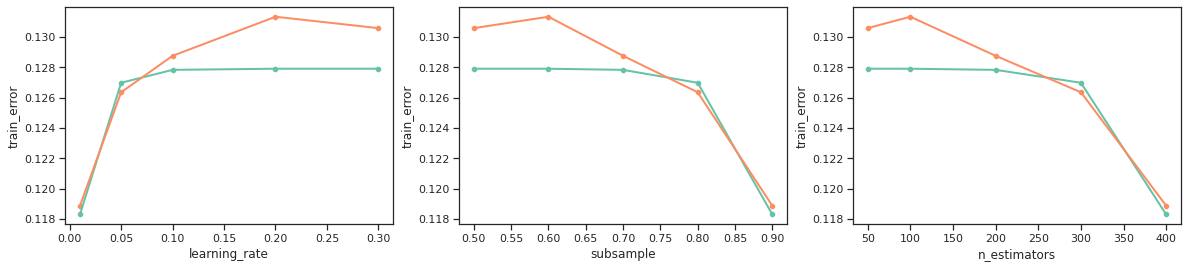

In [10]:
rows=1
cols=3
sns.set_palette("Set2")
fig, axs = plt.subplots(rows,cols,figsize = (20,4))
model_param = ['learning_rate','subsample','n_estimators']

for i in range(len(model_param)):
    sns.lineplot(ax=axs[i], data=grid, x=model_param[i], y='train_error')
    sns.scatterplot(ax=axs[i], data=grid, x=model_param[i], y='train_error')
    sns.lineplot(ax=axs[i], data=grid, x=model_param[i], y='valid_error')
    sns.scatterplot(ax=axs[i], data=grid, x=model_param[i], y='valid_error')

#### <span style='color:green'> **[done]** </span> Train model with chosen parameters:

In [11]:
grid[grid.valid_error == np.min(grid.valid_error)]

,learning_rate,subsample,n_estimators,train_error,valid_error
4,0.01,0.9,400,0.1183,0.118875


In [12]:
xgboost_reg = set_xgboost_reg(X_columns=X, y_columns=y, data=df, n=grid.loc[0,'n_estimators'], learning_rate=grid.loc[0,'learning_rate'], subsample=grid.loc[0,'subsample'], max_depth=len(X))
df = set_predictions(model=xgboost_reg, X_columns=X, y_columns=y, data=df)
df.tail(3)

,set,date,fighter,opponent,weight_class,result,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
948,train,1997-05-30,Tito Ortiz,Guy Mezger,Lightweight,lose,SUB,False,False,-0.001066,0.183734,0.399174,-0.843823,1.173775,-1.185172,0.6,0.180204,1.164006,0.966781,-1.041286,0.116418,-2.453751,-1.479856,0.574988,-0.010236,-0.010236,-0.010236,-0.010236
949,test,1997-02-07,Jerry Bohlander,Nick Sanzo,Lightweight,win,SUB,False,False,-0.001066,0.073252,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,0.116418,1.680711,1.125253,-0.592359,0.986947,0.986947,0.986947,0.986947
950,test,1997-02-07,Rainy Martinez,Jerry Bohlander,Lightweight,lose,SUB,False,False,-0.001066,-0.000402,-0.385877,-0.843823,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,0.116418,-1.636761,-1.107697,0.574988,0.039854,0.039854,0.039854,0.039854


#### <span style='color:green'> **[done]** </span> Add predictions to data:

In [13]:
#test
pred_columns = ['kd_dif_pred','str_dif_pred','td_dif_pred','sub_dif_pred']
pred = df[['date','fighter','opponent'] + pred_columns]
pred.head(3)

,date,fighter,opponent,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
0,2023-04-15,Clay Guida,Rafa Garcia,0.004457,0.004457,0.004457,0.004457
1,2023-04-15,Daniel Zellhuber,Lando Vannata,1.336919,1.336919,1.336919,1.336919
2,2023-03-18,Justin Gaethje,Rafael Fiziev,0.314851,0.314851,0.314851,0.314851


In [21]:
data = pd.read_csv('../data/data_train_test_valid_assigned.csv')
data = pd.merge(data,pred, on=['date','fighter','opponent'], how='outer')

data.to_csv('../data/data_train_test_valid_assigned.csv', index=None)
print('../data/data_train_test_valid_assigned.csv saved.')
data.tail(3)

../data/data_train_test_valid_assigned.csv saved.


,set,date,fighter,opponent,weight_class,result,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
6314,train,1994-03-11,Remco Pardoel,Alberta Cerra Leon,Open Weight,win,SUB,False,False,-0.001066,0.110079,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,1.572764,0.021975,0.008778,-0.008685,NaN,NaN,NaN,NaN
6315,test,1994-03-11,Robert Lucarelli,Orlando Wiet,Open Weight,lose,KO/TKO,False,False,-0.001066,-0.221366,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,-1.002921,0.021975,0.008778,-0.008685,NaN,NaN,NaN,NaN
6316,validation,1994-03-11,Johnny Rhodes,David Levicki,Open Weight,win,KO/TKO,False,False,-0.001066,0.257388,0.399174,0.014263,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,0.116418,0.021975,0.008778,-0.008685,NaN,NaN,NaN,NaN


#### <span style='color:green'> **[done]** </span> Saving model as pickle:

In [22]:
save_trained_model(model=xgboost_reg,filename_path='../global_variables/stats_pred_' + set_lower_cases(weight) + '_xgboost_reg')

../global_variables/stats_pred_lightweight_xgboost_reg.pkl saved.
